<a href="https://colab.research.google.com/github/AbhyanandSharma2005/ML-model-practice-on-real-data/blob/main/Adaboost_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

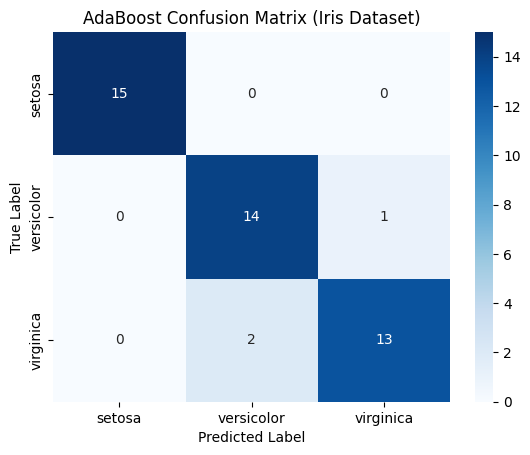

AdaBoost Accuracy on training set: 1.0000
AdaBoost Accuracy on test set: 0.9333


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42), # Changed base_estimator to estimator
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('AdaBoost Confusion Matrix (Iris Dataset)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"AdaBoost Accuracy on training set: {model.score(X_train, y_train):.4f}")
print(f"AdaBoost Accuracy on test set: {model.score(X_test, y_test):.4f}")